<a href="https://colab.research.google.com/github/isaac-altair/3251---Statistics-for-Data-Science/blob/master/Logistic_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The idea behind this notebook is to create a simple logistic regression.

In [33]:
import numpy as np

In [34]:
# X is of shape (m examples, n features)
# Y is of shape (m examples, 1)
# w is of shape (n features, 1)
# A is of shape (m examples, 1)

class LogisticRegressionManual:
  """
  A manual implementation of Logistic Regression using only NumPy.

  This class performs binary classification by learning parameters (weights and
  bias) through gradient descent. It demonstrates how logistic regression works
  internally, without relying on libraries like scikit-learn or TensorFlow.
  """
  def __init__(self, learning_rate = 0.01, number_of_iterations = 1000,
               print_cost = False):

    """
    Initialize model hyperparamters and placeholders for weights and bias.

    Parameters
    ----------
    learning_rate : float, optional
      The learning rate is used in gradient descent updates.
    Number of iterations : int, optional
      The number of iterations to run gradient descent.
    print_cost : bool, optional
      Whether to print the cost every 100 iterations.
    """

    self.learning_rate = learning_rate
    self.number_of_iterations = number_of_iterations
    self.print_cost = print_cost
    self.w = None
    self.b = None
    self.costs = []

  def sigmoid(self, z):

    """
    Compute the sigmod of z.

    Parameters
    ----------
    z : np.ndarray
        Linear combination of inputs and weights (can be scalar or vector).

    Returns
    -------
    np.ndarray
        Sigmod-activated output (values between 0 and 1)
    """

    return 1 / (1 + np.exp(-z))

  def initialize_with_zeros(self, dim):

    """
    Initialize weights and bias with zeros.

    Parameters
    ----------

    dim : int
        Number of features (columns in X).

    Returns
    -------
    w : np.ndarray
        Initialized weight vector of shape (dim, 1)
    b : float
        Initialized bias term (0.0)
    """

    w = np.zeros([dim,1])
    b = 0.0

    return w, b

  def propagate(self, w, b, X, Y):

    """
    Perform forward and backward propagation.

    Parameters
    ----------
    w : np.ndarray
        Current weight vector of shape (n_features, 1)
    b : float
        Current bias term
    X : np.ndarray
        Feature matrix of shape (m_examples, n_features)
    Y : np.ndarray
        True labels vector of shape (m_examples, 1)

    Returns
    -------
    grads : dict
        Gradients with respect to weights and bias:
        {'dw' : dw, 'db' : db}
    cost : float
        The logistic regression cost (log loss)
    """

    m = X.shape[0]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = self.sigmoid(np.dot(X, w) + b) # compute activation; same as tf.matmul
    cost = -1/m * (np.sum(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8)))   # compute cost. Add 1e-8 to avoid log(0) errors

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1 / m * (np.dot(X.T,(A - Y)))
    db = 1 / m * (np.sum(A - Y))

    cost = np.squeeze(cost)

    grads = {"dw": dw,
            "db": db}

    return grads, cost

  def optimize(self, w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    """
    Optimize weights and bias using gradient descent.

    Parameters
    ----------
    w : np.ndarray
        Initial weight vector.
    b : float
        Initial bias term.
    X : np.ndarray
        Feature matrix of shape (m_examples, n_features).
    Y : np.ndarray
        True labels vector of shape (m_examples, 1).
    num_iterations : int
        Number of iterations for gradient descent.
    learning_rate : float
        Learning rate for gradient descent updates.
    print_cost : bool, optional
        Whether to print cost every 100 iterations.

    Returns
    -------
    params : dict
        Learned parameters {'w': w, 'b': b}.
    grads : dict
        Gradients {'dw': dw, 'db': db}.
    costs : list
        List of costs computed during optimization.
    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = self.propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        w = w - learning_rate*dw
        b = b - learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
            "db": db}

    return params, grads, costs

  def fit(self, X, Y):

    """
    Train the logistic regression model.

    Parameters
    ----------
    X : np.ndarray
        Training features matrix of shape (m_examples, n_features).
    Y : np.ndaray
        True labels vector of shape (m_examples, 1)
    """

    dim = X.shape[1] # Want to get the number of features which is the number
                     # of columns in X
    self.w, self.b = self.initialize_with_zeros(dim)
    params, grads, costs = self.optimize(self.w, self.b, X, Y,
                                         self.number_of_iterations,
                                         self.learning_rate,
                                         self.print_cost)

    self.w, self.b = params["w"], params["b"] # w and b are saved as
                                              # instance attributes so that
                                              # they can be further used
                                              # in predict function
    self.costs = costs

  def predict(self, X):

    """
    Predict class labels (0 or 1) for given input data.

    Parameters
    ----------
    X : np.ndarray
        Input feature matrix of shape (m_examples, n_features)

    Returns
    -------
    Y_prediction : nd.array
        Predicted class labels of shape (m_examples, 1)
    """

    A = self.sigmoid(np.dot(X, self.w) + self.b) # (m, 1)

    Y_prediction = (A > 0.5).astype(int)

    return Y_prediction

In [35]:
logreg = LogisticRegressionManual()

In [36]:
logreg.sigmoid(np.array([1, 12, 13]))

array([0.73105858, 0.99999386, 0.99999774])

Create dummy data

In [42]:
# Set random seed for reproducibility
np.random.seed(0)

# Number of samples and features
m = 200   # samples
n = 5     # features

# Generate random features
X = np.random.randn(m, n)

# True (hidden) weights and bias
true_w = np.array([[2], [-3], [4], [-1], [9]])
true_b = 0.5

# Generate probabilities and binary labels
Y_prob = 1 / (1 + np.exp(-(X @ true_w + true_b)))  # sigmoid
Y = (Y_prob > 0.5).astype(int)

Split the data

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Train the model

In [63]:
model = LogisticRegressionManual(
    learning_rate=0.01,
    number_of_iterations=10000,
    print_cost=True
)

model.fit(X_train, Y_train)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.567301
Cost after iteration 200: 0.485684
Cost after iteration 300: 0.429782
Cost after iteration 400: 0.389366
Cost after iteration 500: 0.358794
Cost after iteration 600: 0.334815
Cost after iteration 700: 0.315453
Cost after iteration 800: 0.299449
Cost after iteration 900: 0.285962
Cost after iteration 1000: 0.274413
Cost after iteration 1100: 0.264390
Cost after iteration 1200: 0.255590
Cost after iteration 1300: 0.247788
Cost after iteration 1400: 0.240810
Cost after iteration 1500: 0.234522
Cost after iteration 1600: 0.228818
Cost after iteration 1700: 0.223613
Cost after iteration 1800: 0.218839
Cost after iteration 1900: 0.214439
Cost after iteration 2000: 0.210366
Cost after iteration 2100: 0.206582
Cost after iteration 2200: 0.203054
Cost after iteration 2300: 0.199753
Cost after iteration 2400: 0.196656
Cost after iteration 2500: 0.193742
Cost after iteration 2600: 0.190994
Cost after iteration 2700: 0.188396
Cost

Make predictions on the X_test

In [64]:
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.90


Plot the data

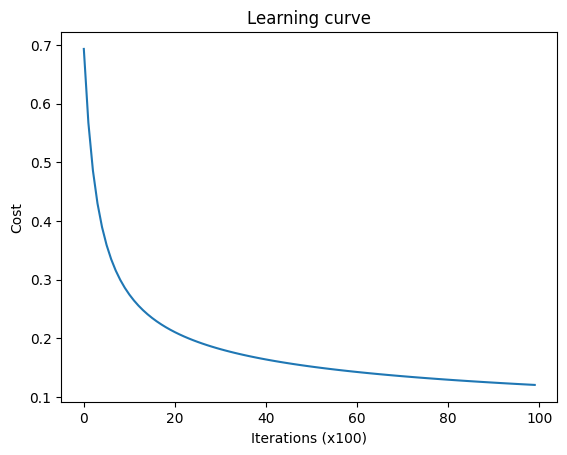

In [65]:
import matplotlib.pyplot as plt

plt.plot(model.costs)
plt.xlabel("Iterations (x100)")
plt.ylabel("Cost")
plt.title("Learning curve")
plt.show()